### Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
df1 = pd.read_csv(r"C:\Users\moonm\non_fiction_books.csv")
df2 = pd.read_csv(r"C:\Users\moonm\fiction_books.csv")

### Shape & Head

In [3]:
df1.shape, df2.shape

((61, 7), (96, 7))

In [4]:
df1.head()

,Title,Price,Original_Price,Discount,Author,Genres,Description
0,The Poverty of Philosophy,200.00,250.00,20%,Karl Marx,Non-Fiction,"“…they see in poverty nothing but poverty, wit..."
1,Relativity: The Special and General Theory,140.00,175.00,20%,Albert Einstein,Non-Fiction,“The important thing is not to stop questionin...
2,Candide,120.00,150.00,20%,Voltaire,Non-Fiction,"Candide, a privileged and sheltered young man,..."
3,Essays: First and Second Series,236.00,295.00,0,Ralph Waldo Emerson,Non-Fiction,Ralph Waldo Emerson's Essays: First and Second...
4,The Upanishads,120.00,150.00,20%,Swami Paramananda,Non-Fiction,Swami Paramananda's The Upanishads explores an...


In [5]:
df2.head()

,Title,Price,Original_Price,Discount,Author,Genres,Description
0,Volpone,116.00,145.00,20%,Ben Jonson,Fiction,"Volpone (or The Fox) is a comedy in five acts,..."
1,Twelfth Night,100.00,125.00,20%,William Shakespeare,Fiction,"Twelfth Night is a tale of unrequited love, hi..."
2,The Rudyard Kipling Collection,679.00,849.00,20%,Rudyard Kipling,Fiction,"(1) The Jungle Books: - Kipling's allegory, Th..."
3,The Old Man and the Sea,100.00,125.00,20%,Ernest Hemingway,Fiction,"“But man is not made for defeat,” he said. “A ..."
4,Pride And Prejudice,236.00,295.00,20%,Jane Austen,Fiction,In the delightful social comedy of Pride and P...


### Data Combining

In [6]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [7]:
df

,Title,Price,Original_Price,Discount,Author,Genres,Description
0,The Poverty of Philosophy,200.00,250.00,20%,Karl Marx,Non-Fiction,"“…they see in poverty nothing but poverty, wit..."
1,Relativity: The Special and General Theory,140.00,175.00,20%,Albert Einstein,Non-Fiction,“The important thing is not to stop questionin...
2,Candide,120.00,150.00,20%,Voltaire,Non-Fiction,"Candide, a privileged and sheltered young man,..."
3,Essays: First and Second Series,236.00,295.00,0,Ralph Waldo Emerson,Non-Fiction,Ralph Waldo Emerson's Essays: First and Second...
4,The Upanishads,120.00,150.00,20%,Swami Paramananda,Non-Fiction,Swami Paramananda's The Upanishads explores an...
...,...,...,...,...,...,...,...
152,The Hound of the Baskervilles,156.00,195.00,20%,A. Conan Doyle,Fiction,The Hound of the Baskervilles is Sir Arthur Co...
153,The Adventures Of Sherlock Holmes,236.00,295.00,20%,Sir Arthur Conan Doyle,Fiction,The Adventures of Sherlock Holmes is a collect...
154,Story Of A Young Lawyer,100.00,125.00,20%,Panchajanya Batra Singh,Fiction,Newly married Tara struggles through the forma...
155,Northanger Abbey,120.00,150.00,20%,Jane Austen,Fiction,"Northanger Abbey, written during the same peri..."


### Dropping Description Column

In [8]:
df = df.drop(columns=['Description'])

### Data Cleaning

In [9]:
df.shape

(157, 6)

In [10]:
df.head()

,Title,Price,Original_Price,Discount,Author,Genres
0,The Poverty of Philosophy,200.00,250.00,20%,Karl Marx,Non-Fiction
1,Relativity: The Special and General Theory,140.00,175.00,20%,Albert Einstein,Non-Fiction
2,Candide,120.00,150.00,20%,Voltaire,Non-Fiction
3,Essays: First and Second Series,236.00,295.00,0,Ralph Waldo Emerson,Non-Fiction
4,The Upanishads,120.00,150.00,20%,Swami Paramananda,Non-Fiction


In [11]:
df.dtypes

Title             object
Price             object
Original_Price    object
Discount          object
Author            object
Genres            object
dtype: object

In [12]:
df['Discount'] = df['Discount'].replace('No Discount', '0')
df['Discount'] = df['Discount'].str.replace('%', '').astype(float)

In [13]:
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [14]:
df['Original_Price'] = df['Original_Price'].str.replace(r'[^\d.]', '', regex=True)
df['Original_Price'] = pd.to_numeric(df['Original_Price'], errors='coerce')

### Null & Duplicate Value

In [15]:
pd.isnull(df).sum()

Title             0
Price             6
Original_Price    0
Discount          0
Author            0
Genres            0
dtype: int64

In [16]:
df['Price'] = df['Price'].fillna(0)

In [17]:
## Duplicate Value
df.duplicated().sum()

0

In [18]:
df.dtypes

Title              object
Price             float64
Original_Price    float64
Discount          float64
Author             object
Genres             object
dtype: object

In [19]:
df.head(5)

,Title,Price,Original_Price,Discount,Author,Genres
0,The Poverty of Philosophy,200.0,250.0,20.0,Karl Marx,Non-Fiction
1,Relativity: The Special and General Theory,140.0,175.0,20.0,Albert Einstein,Non-Fiction
2,Candide,120.0,150.0,20.0,Voltaire,Non-Fiction
3,Essays: First and Second Series,236.0,295.0,0.0,Ralph Waldo Emerson,Non-Fiction
4,The Upanishads,120.0,150.0,20.0,Swami Paramananda,Non-Fiction


#### Cleaning Whitespace from column

### Exploratory Data Analysis

In [20]:
df[['Price','Original_Price', 'Discount']].describe()

,Price,Original_Price,Discount
count,157.000000,157.000000,157.000000
mean,284.140127,371.560510,17.955414
std,339.901201,425.879879,6.457300
min,0.000000,85.000000,0.000000
25%,140.000000,195.000000,20.000000
50%,200.000000,250.000000,20.000000
75%,280.000000,350.000000,20.000000
max,3205.000000,4006.000000,39.000000


In [21]:
df["Author"].nunique()

105

In [22]:
df["Genres"].unique()

array(['Non-Fiction', 'Fiction'], dtype=object)

### Most Expensive & Cheapest Books

In [23]:
print("Most Expensive Book:\n", df.loc[df["Price"].idxmax()])
print("\nCheapest Book:\n", df.loc[df["Price"].idxmin()])

Most Expensive Book:
 Title             The Routledge Anthology of Climate Fiction
Price                                                 3205.0
Original_Price                                        4006.0
Discount                                                20.0
Author                                         Gillard, Bill
Genres                                               Fiction
Name: 76, dtype: object

Cheapest Book:
 Title             The Stepchild (Oip): Angaliyat
Price                                        0.0
Original_Price                             325.0
Discount                                     0.0
Author                             Joseph Macwan
Genres                                   Fiction
Name: 74, dtype: object


### Genre-Wise Analysis

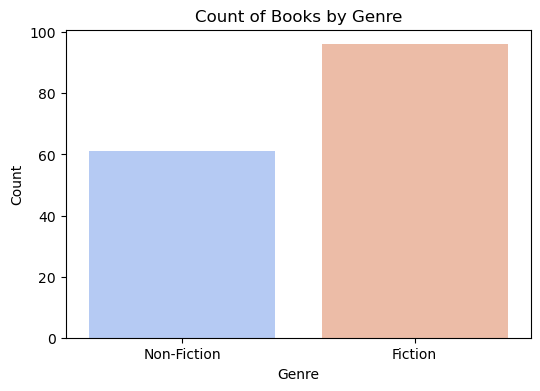

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="Genres", hue="Genres", data=df, palette="coolwarm", legend=False)
plt.title("Count of Books by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

### Total Revenue by Genre

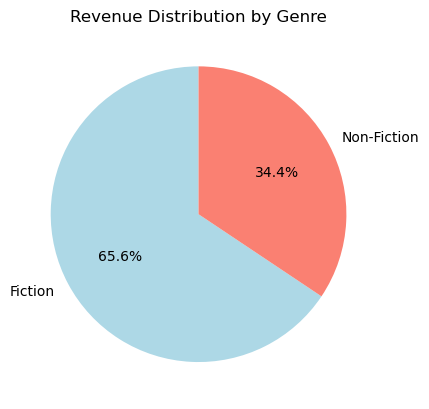

In [25]:
df["Revenue"] = df["Price"]
genre_revenue = df.groupby("Genres")["Revenue"].sum()
genre_revenue.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["lightblue", "salmon"])
plt.ylabel("")
plt.title("Revenue Distribution by Genre")
plt.show()

### Correlation Between Price, Discount

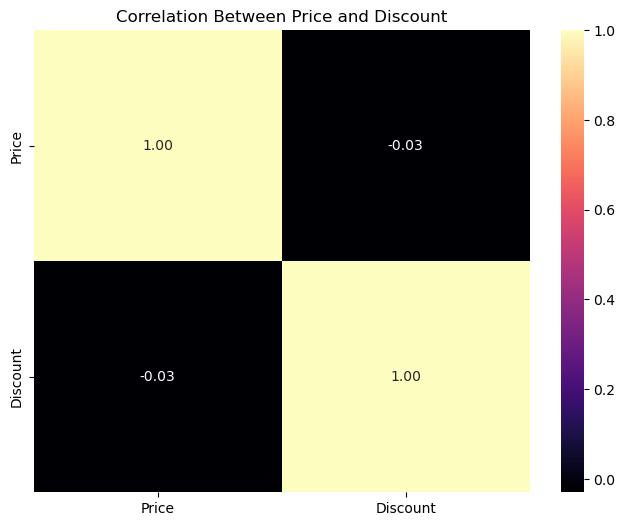

In [26]:
corre = df[["Price", "Discount"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corre, annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Between Price and Discount")
plt.show()

### Top 10 Authors with Most Books

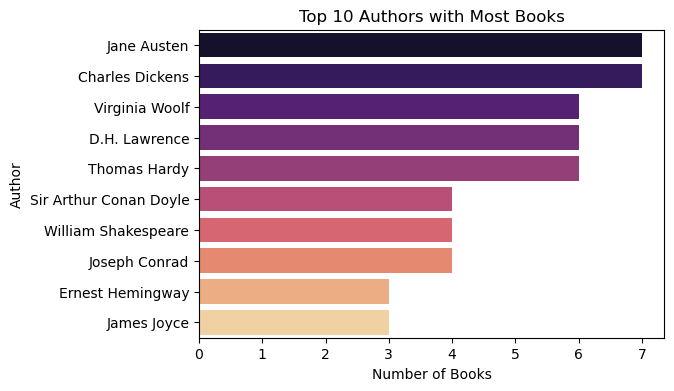

In [27]:
top_authors = df["Author"].value_counts().head(10).reset_index()
top_authors.columns = ["Author", "Book Count"]

plt.figure(figsize=(6,4))
sns.barplot(x="Book Count", y="Author", data=top_authors, hue="Author", palette="magma", legend=False)
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.title("Top 10 Authors with Most Books")
plt.show()

### Top 10 Expensive Books

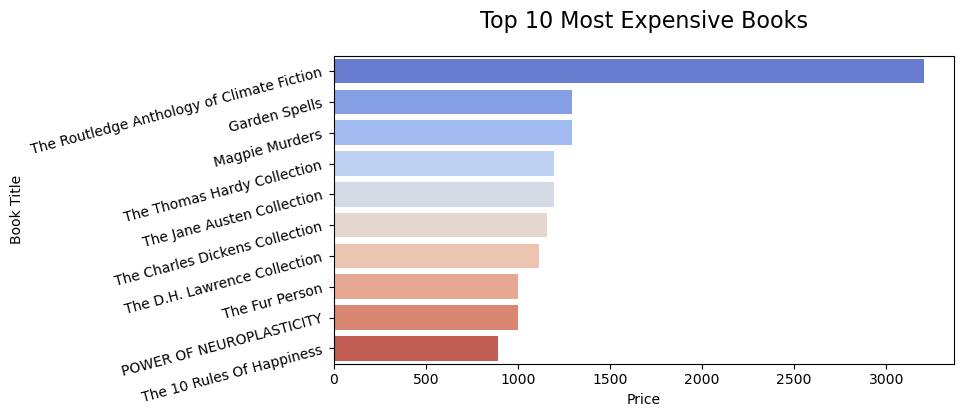

In [28]:
top_books = df.sort_values(by="Price", ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(y="Title", x="Price", data=top_books, hue="Title", palette="coolwarm", legend=False)
plt.title("Top 10 Most Expensive Books", fontsize=16, pad=20)
plt.xlabel("Price")
plt.ylabel("Book Title")
plt.yticks(rotation=15) 
plt.show()

### Discount Percentage Distribution

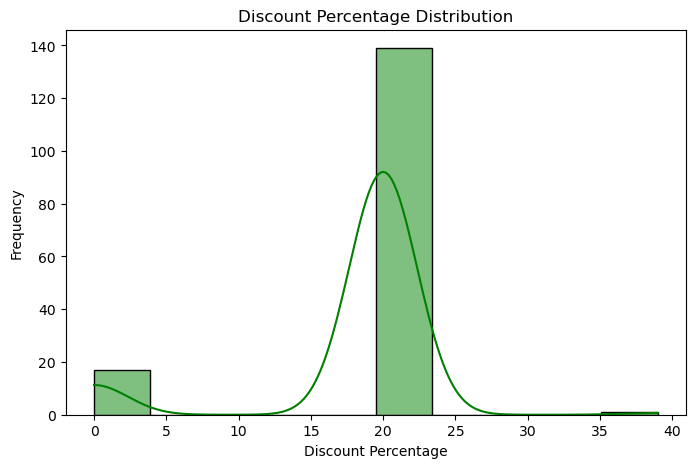

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Discount"], bins=10, kde=True, color="green")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.title("Discount Percentage Distribution")
plt.show()

### Top 10 Revenue by Author

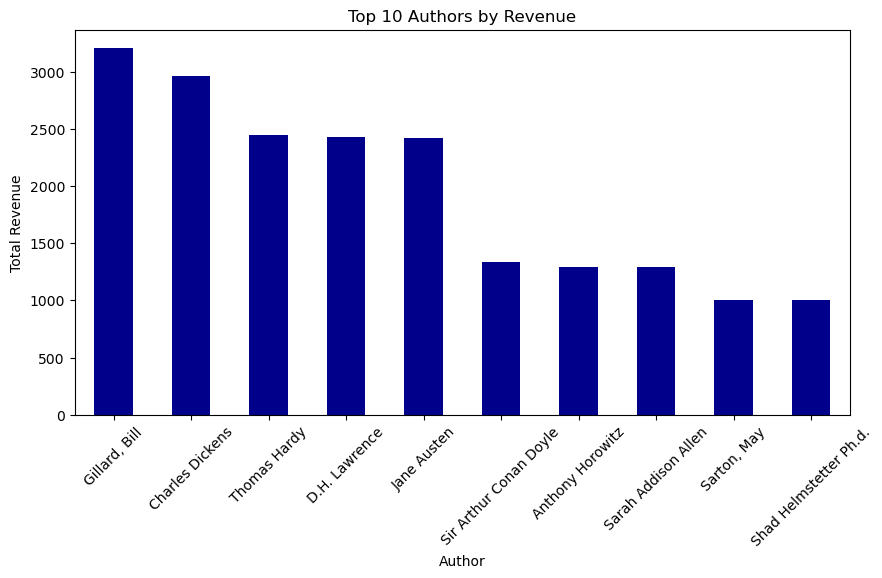

In [30]:
author_revenue = df.groupby("Author")["Revenue"].sum()
top_10_author_revenue = author_revenue.nlargest(10)
plt.figure(figsize=(10, 5))
top_10_author_revenue.plot(kind="bar", color="darkblue")
plt.xlabel("Author")
plt.ylabel("Total Revenue")
plt.title("Top 10 Authors by Revenue")
plt.xticks(rotation=45)
plt.show()

### Genre Distribution (Fiction vs Non-Fiction

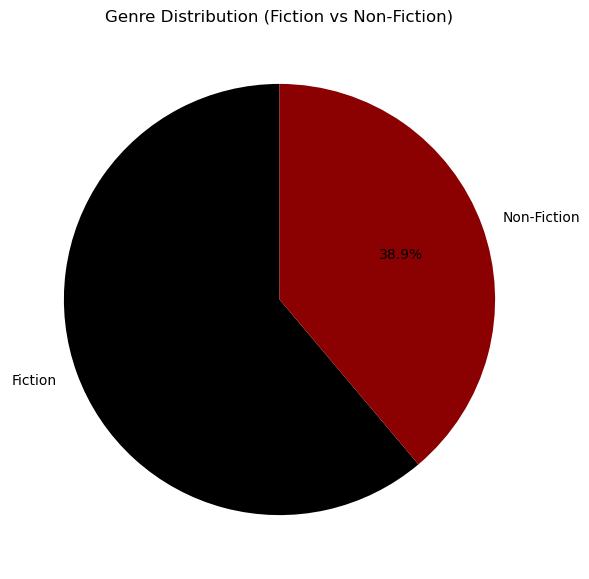

In [31]:
genre_counts = df["Genres"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=90, colors=["black", "darkred"])
plt.title("Genre Distribution (Fiction vs Non-Fiction)")
plt.show()

###  Top 5 Books with Maximum Discount

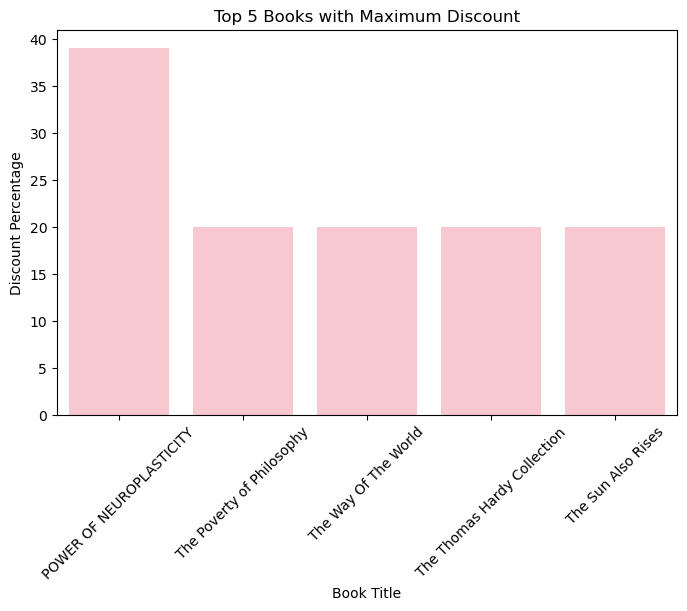

In [32]:
top_5_discount_books = df.sort_values(by="Discount", ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x="Title", y="Discount", data=top_5_discount_books, color="pink")
plt.xlabel("Book Title")
plt.ylabel("Discount Percentage")
plt.title("Top 5 Books with Maximum Discount")
plt.xticks(rotation=45)
plt.show()